In [43]:
import matplotlib.pyplot as plt
import numpy as np
import math

Problem Statement - 
There is a game played with the dies. You can call one of the numbers between 1 to 6. However there is a hidden parameter controlling the probability of getting an one. The problem is to estimate this hidden parameter with the result of this dies rolls.

Data - Each sample is either 0 for an one or 1 for any other number. Let the probability for getting an one be $\theta$ and for getting any other number be 1 - $\theta$ 

The total number of times an one appears out of n trials is y and given by the binomial distribution - p(y|$\theta$, n).
p(y|$\theta$, n) = $^n$$C_{y}$ $\theta^y$ (1-$\theta$)$^n$$^-$$^y$.

In [44]:
#Code to generate data points
def generateData(n):
    data = np.random.randint(1, 7, size=n)
    return data

print generateData(10)

[4 2 4 4 1 3 6 2 1 5]


In [45]:
def ncr(n, r):
    f = math.factorial
    return f(n) // f(r) // f(n-r)

#Function to calculate the likelihood.
def likelihood(theta, n):
    print(theta)
    all_likelihood = []
    for i in range(1, n+1):
        likelihood_i = ncr(n, i) * (theta**i) * (1-theta)**(n-i)
        all_likelihood.append(likelihood_i)
    return all_likelihood  

In [46]:
print likelihood(1/6.0, 10)

0.166666666667
[0.3230111657796916, 0.2907100492017224, 0.15504535957425192, 0.05426587585098817, 0.013023810204237159, 0.002170635034039526, 0.00024807257531880297, 1.860544314891022e-05, 8.269085843960098e-07, 1.6538171687920194e-08]


In [47]:
#Drawing the histogram of data
def barChart(data):
    x = [a for a in range(1, len(data)+1)]
    plt.bar(x, data, 1/1.5, color="blue")
    plt.xlabel('y')
    plt.ylabel('likelihood')
    plt.show()

0.166666666667


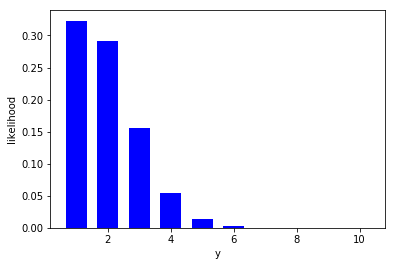

In [48]:
data = likelihood(1/6.0, 10)
barChart(data)

0.166666666667


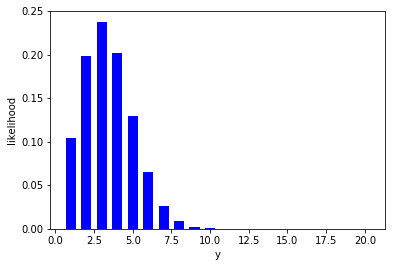

In [49]:
#Plot for n = 20
data = likelihood(1/6.0, 20)
barChart(data)

0.333333333333


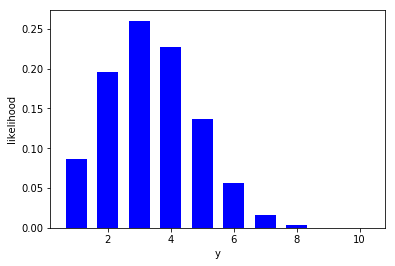

In [50]:
#Plot for n = 10, with biased dies having the pobability of getting an odd number as 0.7 i.e theta = 0.7
data = likelihood(2/6.0, 10)
barChart(data)

0.0833333333333


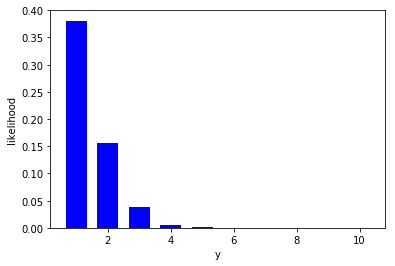

In [51]:
#Plot for n = 10, with theta = 0.2
data = likelihood(0.5/6, 10)
barChart(data)

We have to calculate the value of $\theta$. For that we first calculate the value of p($\theta$ | y,n) i.e the probability of getting one given y - the number of times one appears and n the number of trials. We can find this value by applying the Bayes rule.

p($\theta$ | y, n) = ( p(y | $\theta$, n) * p($\theta$ | n) ) / p( y | n)

The posterior is p($\theta$ | y,n) <br>
The likelihood is p(y | $\theta$ | y,n) <br>
The prior is p($\theta$ | n) <br>
Normailzing Constant is p(y | n)

I have already calculated the likelihood. We don't know anything about the prior i.e the probability of $\theta$ given n trails. We can say that this would be a number between [0, 1]. Thus we can say that the posterior is proportional to likelihood. Bayes in his original paper showed that p(y|n) = 1 / n+1. So we can say that the formula for calculating the posterior value is $^n$$C_{y}$ $\theta^y$ (1-$\theta$)$^n$$^-$$^y$ * (1+n). Below I have calulated these values and drawn the pdfs so as to esitmate the value of $\theta$.

In [52]:
#Function to calculate the posterior
def posterior(y, n):
    theta = [0, 1/6.0, 2/6.0, 3/6.0, 4/6.0, 5/6.0, 1]
    posterior = []
    for each_theta in theta:
        posterior_each = ncr(n,y) * (each_theta**y) * ((1-each_theta)**(n-y)) * (n+1)
        posterior.append(posterior_each)
    plt.plot(theta, posterior, '-', linewidth=1)
    plt.show()

8


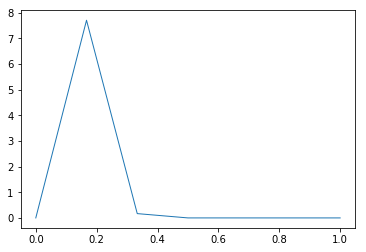

In [53]:
data = generateData(50)
y = np.count_nonzero(data == 1)
print(y)
posterior(y, 50)

The value of $\theta$ for the above values of 50 trails with ones appearing randomly is show above.

20


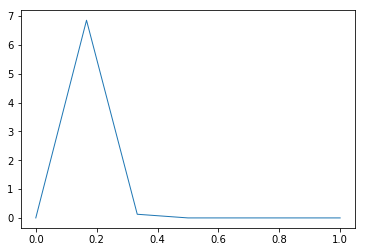

In [61]:
data = generateData(100)
y = np.count_nonzero(data == 1)
print(y)
posterior(y, 100)

The value of $\theta$ for the above values of 100 trails with ones appearing randomly is shown above.

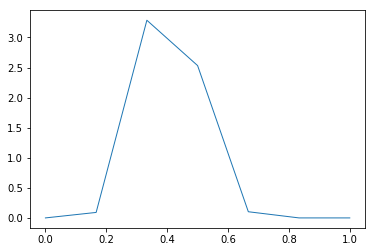

In [55]:
posterior(10, 25)

The value of $\theta$ for the above values of 25 trails and one appearing 10 times is approx 0.33

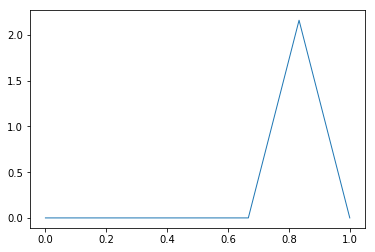

In [20]:
posterior(90, 100)

The value of $\theta$ for the above values of 100 trails and one appearing 90 times is approx 0.82

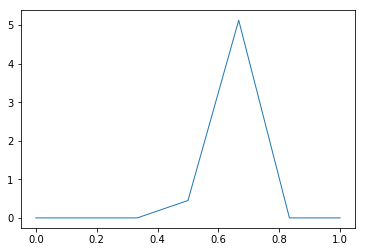

In [56]:
posterior(62, 100)

The value of $\theta$ for the above values of 100 trails and one appearing 62 times is approx 0.63

We can say that the value of $\theta$ is approximately the number of time an odd number occurs divided by the total number of trials. 